# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 2</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC, Australia.

### <span style="color:#0b486b">Due: 5pm, 22th May 2020 </span>
---

## <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 2. Some sections have been partially completed  to help you get started. **The total marks for this notebook is 200**.

* Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment2_instructions.pdf*  to know what else you need to complete for this assignment as well submission instruction. <br><br>

* Instructions marked with **(D)** and **(HD)** are for students aiming at high grades. They are more involved and can be completed after all other instructions.


* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL**, there will be place where you **must** provide your own comment when instructed. <br><br>


### Submission

You are required to submit **five** files: <br><br>

* The source of your solution notebook: **[groupID]_assignment2_solution.ipynb**
* An exported version of your output: **[groupID]_assignment2_output.html**  
* Three json data files storing tweets collected for the three keywords, named **[groupID]_[w1].json**, **[groupID]_[w2].json**, **[groupID]_[w3].json** where **[w1], [w2], [w3]** are the three keywords you have been provided.
    


As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instruction** mean the instructions given to you to complete the designated section.

## <span style="color:#0b486b">Part 1: Crawling and Storing Tweet Data</span>


The first part of the assignment examines your skills and knowledge to query tweets and store them in json files. For **each** provided keyword, your tasks are:

* Crawl all tweets which contain this keyword written in English and geocoded within the location, provided for your group.
* Store the tweets collected into json files.

***Follow the instructions below to complete your task***.

**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the following cell.

In [1]:
import sys
sys.path.append("C:\Python38\Lib\site-packages")

#Import packages needed for processing
import re
import json
import xml
import numpy as np
from collections import Counter
from TwitterAPI import TwitterAPI # in case you need to install this package, see practical 6
from sklearn.cluster import KMeans

import requests

# disabling urllib3 warnings
requests.packages.urllib3.disable_warnings()

import matplotlib.pyplot as plt
%matplotlib inline

#If you need add any additional packages, then add them below
from sklearn.metrics import pairwise_distances_argmin

**Instruction 1.1**. Enter your provided keywords to the variable **keywords** below.

[**Total mark: 3**]

In [2]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

#Enter the list of three keywords you selected to the variables keywords below
#e.g. keywords = ["abc", "def", "ghi"]

keywords =  ['blow', 'walk', 'book']

**Instruction 1.2**. Before you can perform a query to Twitter API, you need to supply authentication information. Practical sessions 6 and 7 show you how to obtain this information. **Your task is to supply the authentication information in the cell below**.

**Note**: You might decide to regenerate this authentication from the pracs if you would like too. <span style="color:red">After the assignment has been marked, you are strongly recommended to regenerate this authentication information from your account to maintain your privacy.</span> 


[**Total mark: 5**]

In [3]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# Twitter API credentials 
CONSUMER_KEY = "nyEG6GBrJUcrG3Pns120fZO7L"
CONSUMER_SECRET = "w01ruJ2RwvyX8cAg8XxCleamZFtuQao8Vulnp81HGi4VW0Xosw"
OAUTH_TOKEN = "134614257-nUu1wfkuFmT4559lszVOLuqexWyHaAH4hooJmlvl"
OAUTH_TOKEN_SECRET = "ytgC8psyPRNuBBdsir3ZU9PcBHKYMJY01Ua2WHbqv3QzF"

# Authonticating with your application credentials
api = TwitterAPI(CONSUMER_KEY,
                 CONSUMER_SECRET,
                 OAUTH_TOKEN,
                 OAUTH_TOKEN_SECRET) #INSERT YOUR CODE HERE# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

**Note**: As you have learned from the pracical sessions, to perform a query from Twitter API for a particular geo-coded location you need a center point and a radius. The center point is specified by its (latitude,longitute) pair. **The information below has been provided to you to perform the query in the subsequent tasks**.

In [4]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# geo coordinations of the desired place
PLACE_LAT = 37.7749
PLACE_LON = -122.4194
PLACE_RAD = 200

**Instruction 1.3**. For each keyword, you are required to crawl at least **200** tweets (the more the better) using the Twitter API. However, as you have learned from the practical sessions, each query will return a maximum of only **100** tweets. Therefore, subsequent query **must** use the maximum Tweet ID from the previous batch to crawl the next lot.

The following function, called ***retrieve_tweets()***, has been **partially** implemented to automatically download tweets until it reaches the maximum number of tweets needed. 

For example, a function call
```
retrieve_tweets(api, 'car', 50, 200, latitude, longitude, radius)
```
will attempt to crawl a total of at least 200 tweets that contains the word 'car' for a location with given latitude, longidude and radius around it. Within each single query, it will attempt to obtain 50 tweets.

**Your task is to walk through this function and enter your own codes where instructed to complete the function**.

[**Total mark: 10**]

In [5]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
You will be required to insert your own codes to complete this function. 
Walk through this function and enter your own codes where instructed.
'''
def retrieve_tweets(api, keyword, batch_count, total_count, latitude, longitude, radius):
    """
    collects tweets using the Twitter search API
    
    api:         Twitter API instance
    keyword:     search keyword
    batch_count: maximum number of tweets to collect per each request
    total_count: maximum number of tweets in total
    """

    
    # the collection of tweets to be returned
    tweets_unfiltered = []
    tweets = []
    
    # the number of tweets within a single query
    batch_count = str(batch_count)
    
    '''
    You are required to insert your own code where instructed to perform the first query to Twitter API.
    Hint: revise the practical session on Twitter API on how to perform query to Twitter API.
    '''
    # per the first query, to obtain max_id_str which will be used later to query sub
    resp = api.request('search/tweets', {'q': keyword, #INSERT YOUR CODE - keyword must be passed in to call function
                                         'count': 200, #INSERT YOUR CODE - count is always 200 
                                         'lang':'en',
                                         'result_type':'recent',
                                         'geocode':'{},{},{}mi'.format(latitude, longitude, radius)})
    
    # store the tweets in a list

    # check first if there was an error
    if ('errors' in resp.json()):
        errors = resp.json()['errors']
        if (errors[0]['code'] == 88):
            print('Too many attempts to load tweets.')
            print('You need to wait for a few minutes before accessing Twitter API again.')
    
    if ('statuses' in resp.json()):
        tweets_unfiltered += resp.json()['statuses']
        tweets = [tweet for tweet in tweets_unfiltered if ((tweet['retweeted'] != True) and ('RT @' not in tweet['text']))]
    
        # find the max_id_str for the next batch
        ids = [tweet['id'] for tweet in tweets_unfiltered]
        max_id_str = str(min(ids))

        # loop until as many tweets as total_count is collected
        number_of_tweets = len(tweets)
        while number_of_tweets < total_count:

            resp = api.request('search/tweets', {'q': keyword, #INSERT YOUR CODE - again, keyword must be passed in
                                             'count': 200, #INSERT YOUR CODE
                                             'lang':'en',
                                             'result_type': 'recent', #INSERT YOUR CODE - 'recent' type is passed in 
                                             'max_id': max_id_str,
                                             'geocode': f"{latitude},{longitude},{radius}mi"} #INSERT YOUR CODE
                              )

            if ('statuses' in resp.json()):
                tweets_unfiltered += resp.json()['statuses']
                tweets = [tweet for tweet in tweets_unfiltered if ((tweet['retweeted'] != True) and ('RT @' not in tweet['text']))]
 
                ids = [tweet['id'] for tweet in tweets_unfiltered]
                max_id_str = str(min(ids))
            
                number_of_tweets = len(tweets)
        
            print("{} tweets are collected for keyword {}. Last tweet created at {}".format(number_of_tweets, 
                                                                                    keyword, 
                                                                                    tweets[number_of_tweets-1]['created_at']))
    return tweets

**Instruction 1.4**. After having defined the ***retrieve_tweets()*** function above, you are now ready to use this function to collect your tweets. Your task is to write the code to perform three function calls, each of which corresponds to one keyword. And, you are required to collect at least **200** tweets for each keyword (the more the better).

[**Total mark: 9**]

In [6]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Your task is to write the code to perform three function calls, each corresponds to one keyword. 
And, you are required to collect at least 200 tweets for each key word.
'''

# Collecting the tweets for three assigned keywords, 
# Your function call should look like this:  retrieve_tweets(api,'keyword',single_count,total_count)

k1_tweets = retrieve_tweets(api, keywords[0], 200, 200, PLACE_LAT, PLACE_LON, PLACE_RAD) 
k2_tweets = retrieve_tweets(api, keywords[1], 200, 200, PLACE_LAT, PLACE_LON, PLACE_RAD)
k3_tweets = retrieve_tweets(api, keywords[2], 200, 200, PLACE_LAT, PLACE_LON, PLACE_RAD)

# PLEASE NOTE THAT IF YOU RUN THIS CELL, IT MIGHT TAKE A WHILE TO DOWNLOAD ALL THE TWEETS REQUIRED.
# MAKE SURE THAT YOU WAIT UNTILL THE CELL FINISHES RUNNING.

128 tweets are collected for keyword blow. Last tweet created at Wed May 20 21:47:54 +0000 2020
198 tweets are collected for keyword blow. Last tweet created at Wed May 20 16:20:33 +0000 2020
264 tweets are collected for keyword blow. Last tweet created at Wed May 20 03:58:51 +0000 2020
38 tweets are collected for keyword walk. Last tweet created at Thu May 21 08:27:44 +0000 2020
66 tweets are collected for keyword walk. Last tweet created at Thu May 21 06:36:46 +0000 2020
98 tweets are collected for keyword walk. Last tweet created at Thu May 21 05:32:31 +0000 2020
137 tweets are collected for keyword walk. Last tweet created at Thu May 21 04:23:19 +0000 2020
175 tweets are collected for keyword walk. Last tweet created at Thu May 21 03:17:17 +0000 2020
221 tweets are collected for keyword walk. Last tweet created at Thu May 21 02:25:45 +0000 2020
73 tweets are collected for keyword book. Last tweet created at Thu May 21 08:40:24 +0000 2020
127 tweets are collected for keyword book. L

**Instruction 1.5**. To verify the downloading process, write your code to print out the number of tweets which has been collected for each keyword.

[**Total mark: 3**]

In [7]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to print the number of tweets have been collected for each keyword
'''
print(f"The number of tweets found with the word {keywords[0]} is {len(k1_tweets)}.")
print(f"The number of tweets found with the word {keywords[1]} is {len(k2_tweets)}.")
print(f"The number of tweets found with the word {keywords[2]} is {len(k3_tweets)}.")

The number of tweets found with the word blow is 264.
The number of tweets found with the word walk is 221.
The number of tweets found with the word book is 256.


**Note:** Each tweet is stored in a dictionary where its keywords are fields in the tweet and values are the information of the fields. The cell below print the type of a tweet.

In [8]:
# Data type of tweets
print(type(k1_tweets[0]))

<class 'dict'>


**Instruction 1.6**.  To examine what the tweets look like, in the cell below write your code to print out all fields of the first tweet in `k1_tweets` and print out the text of the first tweet collected for each keyword.

[**Total mark: 6**]

In [9]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to print out all fields of the first tweet
Hint: You might want to use method keys() of the dictionary
'''
# INSERT YOUR CODE HERE
for i in k1_tweets[0].keys():
    print(i)

print('\n')


'''
Write your code to print out the text of the first  tweet collected for each keyword.
'''

print("\nThe text of the first tweet for \"{}\":\n".format(keywords[0]))
# INSERT YOUR CODE HERE
print(k1_tweets[0]['text'])

print("\nThe text of the first tweet for \"{}\":\n".format(keywords[1]))
# INSERT YOUR CODE HERE
print(k2_tweets[0]['text'])

print('\nThe text of the first tweet for \"{}\":\n'.format(keywords[2]))
# INSERT YOUR CODE HERE
print(k3_tweets[0]['text'])

created_at
id
id_str
text
truncated
entities
metadata
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
is_quote_status
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
lang



The text of the first tweet for "blow":

Mobbin to Joe Blow - Never Let U Go on https://t.co/9tdBhTTa7B #Bayarea #onlineradio #nowplaying

The text of the first tweet for "walk":

if enemies in your path are too hard, you can use the old NES standby: scroll enough that they start to appear on t… https://t.co/OpdMA7XK8d

The text of the first tweet for "book":

#NewRelease #KindleUnlimited

Title: The Beast of Boston
Author: @JLMacbooks
Genre: Mob Romance (Dark)… https://t.co/t6BCMTmYEJ


**Note**. When collecting data from the Internet, such as Twitter, it is important that we store the data collected in an appropriate format for later data analysis task. We have learned that json is a poplular lightweight data format that can be handy to store unstructured data. For example, with NoSQL we can directly query these files in a 'scaling out' fashion. These technologies are representative features of Big Data Analytics.

The following function has been designed for you to save an object which is a list of dictionaries (such as k1_tweets variable) to a json file. **You will need this function for your next task**.

In [10]:
def save_to_json(obj, filename):
    """
    saves a list of dictionaries into a json file
    
    obj: list of dictionaries
    filename: filename
    """
    with open(filename, 'w') as fp:
        json.dump(obj, fp, indent=4, sort_keys=True)   

**Instruction 1.7**. Use the function ***save_to_json()*** defined above, for each collection of tweets you have crawled for each keyword, save them into a file named **w.json** where **w** is the keyword.

For example, if your keywords are 'w1', 'w2' and 'w3', then your code must generate three file w1.json, w2.json and w3.json. **Important: you must submit these files together with your notebook solution**.

[**Total mark: 9**]

In [11]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Use the save_to_json() function defined above, for the collection of tweets 
you have crawled for each keyword, save them into a file named w.json where w is the keyword, taken from keywords list.
'''
# saving the tweets in three json files, one for each keyword
#INSERT YOUR CODE HERE

save_to_json(k1_tweets, 'w1.json')
save_to_json(k2_tweets, 'w2.json')
save_to_json(k3_tweets, 'w3.json')

###                                     END OF PART 1
----

## Part 2: Data Analytics

The second part of this assignment will examine your skills and knowlege in data manipulation and analysis tasks. It includes three main components:

**Part 2A**. For each keyword, you will be required to load the tweets from your saved json files (from Part 1) and filter out all tweets that are too short.

**Part 2B**. Using your knowledge from practical sessions 5, 6 and 7, you will be required to construct the term-by-document matrix for the tweets and to perform visualisation tasks to understand them.

**Part 2C**. You will apply the Kmeans clustering algorithm to cluster your tweets and report the clustering results.

***Follow the instructions below to complete your assigned tasks***.

### Part 2A: Load and Filter Tweets from Files

**Instruction 2.1**. The following function, named ***read_json_file()***, has been partially implemented to load data from a json file. This function will be used later on to load three json files you have saved from Part 1. Your task is to insert your own code where instructed to complete this function.

[**Total mark: 4**]

In [12]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Insert your own code where instructed to complete this function
'''
def read_json_file(filename):
    """
    reads from a json file and saves the result in a list named data
    """
    with open(filename, 'r') as fp:
    # INSERT THE MISSING PIECE OF CODE HERE
        data = json.load(fp)
        return data

**Instruction 2.2**. Now use the ***read_json_file()*** function defined above, write three function calls to load data from three json files you have saved from Part 1.

[**Total mark: 9**]

In [13]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write three function calls to load data from three json files you have saved from Part 1.
'''

k1_tweets = read_json_file('w1.json') # INSERT YOUR CODE HERE - code inserted
k2_tweets = read_json_file('w2.json') # INSERT YOUR CODE HERE - code inserted
k3_tweets = read_json_file('w3.json') # INSERT YOUR CODE HERE - code inserted

**Instruction 2.3**. To examine the number of tweets loaded from your data files, write your code to print out the number of tweets containes in three variables: ***k1_tweets, k2_tweets*** and ***k3_tweets***.

[**Total mark: 3**]

In [14]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to print out the number of tweets containes in three variables: 
k1_tweets, k2_tweets and k3_tweets
'''
#INSERT YOUR CODE HERE
print (f"w1.json: {len(k1_tweets)} tweets")
print (f"w2.json: {len(k2_tweets)} tweets")
print (f"w3.json: {len(k3_tweets)} tweets")

w1.json: 264 tweets
w2.json: 221 tweets
w3.json: 256 tweets


**Note**. When analysing tweets and text documents in general, an important analytics skill is to pre-process and filter the data into the form that one can start to apply analytics methods to extract knowledge. 

Tweets that are too short might not be useful for analysis. We define that tweets having less than 50 characters are short and should be remove. 

**Instruction 2.4**. In this task, you need to filter all short tweets.

1. Write a function called `is_short_tweet` that takes a tweet as an input and return True if the text of the tweet has less than 50 characters and False otherwise. **(6 marks)**

2. Write your codes to remove all tweets that have less than 50 characters in variables ***k1_tweets***, ***k2_tweets*** and ***k3_tweets*** and store the results in the new variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***, respectively. **(8 marks)**

[**Total mark: 14**]

In [15]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
def is_short_tweet(tweet):
    '''
    Check if the text of "tweet" has less than 50 characters
    '''
    # INSERT YOUR CODE HERE - code to check length
    if len(tweet) >= 50:
        return False
    else:
        return True

In [16]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
'''
Write your codes to remove all tweets which have less than 50 characters in variables 
k1_tweets, k2_tweets and k3_tweets and store the results in the new variables 
k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered respectively
'''
# INSERT YOUR CODE HERE
def filter_tweet(tweet_group):
    filtered_tweet = []
    for index in range(len(tweet_group)):
        for j, k in tweet_group[index].items():
            if j == "text" and len(k) >= 50:
                filtered_tweet.append(tweet_group[index])
    
    return filtered_tweet

k1_tweets_filtered = filter_tweet(k1_tweets)
k2_tweets_filtered = filter_tweet(k2_tweets)
k3_tweets_filtered = filter_tweet(k3_tweets)

# these lines below print the number of tweets for each keyword before and after filtered.
print(len(k1_tweets), len(k1_tweets_filtered))
print(len(k2_tweets), len(k2_tweets_filtered))
print(len(k3_tweets), len(k3_tweets_filtered))

264 235
221 205
256 244


**Instruction 2.5**. For each keyword, print out the number of tweets that have been removed.

[**Total mark: 3**]

In [17]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
For each keyword, print out the number of tweets that have been removed.
'''

# INSERT YOUR CODE HERE
print(f"For tweets with the word '{keywords[0]}', {len(k1_tweets) - len(k1_tweets_filtered)} tweets have been filtered out.")
print(f"For tweets with the word '{keywords[1]}', {len(k2_tweets) - len(k2_tweets_filtered)} tweets have been filtered out.")
print(f"For tweets with the word '{keywords[2]}', {len(k3_tweets) - len(k3_tweets_filtered)} tweets have been filtered out.")

For tweets with the word 'blow', 29 tweets have been filtered out.
For tweets with the word 'walk', 16 tweets have been filtered out.
For tweets with the word 'book', 12 tweets have been filtered out.


**Instruction 2.6**. To examine what the tweets look like after being loaded from the data files and filtered, in the cell below write your code to print out the first **5** tweets for each keyword. 

You **must** use the variables ***k1_tweets_filtered, k2_tweets_filtered*** and ***k3_tweets_filtered*** which have stored the data after the filtering process for this task.

[**Total mark: 4**]

In [18]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to print out the first 5 tweets for each keyword.
You must use the variables k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered 
which have stored the data after the filtering process for this task.

Hint: Using tweet['text'] for tweet in k1_tweets_filtered
'''

print('The first 5 tweets for \"{}\":\n'.format(keywords[0]))
# INSERT YOUR CODE HERE - code inserted
for i in range(5):
    print(f"{i+1} {k1_tweets_filtered[i]['text']}")


print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[1]))
# INSERT YOUR CODE HERE - code inserted
for i in range(5):
    print(f"{i+1} {k2_tweets_filtered[i]['text']}")


print('\nThe first 5 tweets for \"{}\":\n'.format(keywords[2]))
# INSERT YOUR CODE HERE - code inserted
for i in range(5):
    print(f"{i+1} {k3_tweets_filtered[i]['text']}")

The first 5 tweets for "blow":

1 Mobbin to Joe Blow - Never Let U Go on https://t.co/9tdBhTTa7B #Bayarea #onlineradio #nowplaying
2 @bard_of_whimsy Do you also practice navigating rooms blind? 😄 Yeah, it's basically inevitable that you'll catch a… https://t.co/aFAomjgp93
3 Mobbin to Joe Blow - My Other Brother on https://t.co/9tdBhTTa7B #Bayarea #onlineradio #nowplaying
4 Follow me👉retweet 💪 and ask for a follow back.. before I blow and it’s too late
5 Get me in Microsoft art and I’ll blow ya mind https://t.co/eiq7UtdA6i

The first 5 tweets for "walk":

1 if enemies in your path are too hard, you can use the old NES standby: scroll enough that they start to appear on t… https://t.co/OpdMA7XK8d
2 @SocialPowerOne1 @KaitBb84 The pure venom of these protests is what bothers me. I am in Oakland and while I cannot… https://t.co/pGbjd4tIet
3 @wxyzdetroit @Local4News @ACLU We live in a World wheir the Government can kill you and walk away literally Scott f… https://t.co/a8zYXbyEuU
4 Congrats 

### Part 2B: Constructing Term-by-Document Matrix

As we have learned in our class, in text analytics and in general dealing with unstructured data, to start perform **computational** tasks such as computing the distance between two documents, we need to represent them in **numerical** formats. A popular technique we have learned is the bag-of-word representation and the term-by-document matrix, also known as the vector-space model.

This part of the assignment will require you to construct the term-by-document matrix for the tweets stored in three variables ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered***.

**Note.** Tweets are often not neat as you might have seen from early tasks. As tweet such as this 
```
Happy shopping👗👚👠👜 (with Vivi and Irmalia at @infomog) — https://t.co/fUGO9Eex1r
```
might contain non-ASCII characters, emoticon, punctuations, etc. Building a bag-of-word representation **without** pre-processing the data can be ineffective. 

The following function ***pre_process()*** has been designed to preprocess the data for you.

In [19]:
def remove_non_ascii(s): return "".join(i for i in s if ord(i)<128)
def pre_process(doc):
    """
    pre-processes a doc
      * Converts the tweet into lower case,
      * removes the URLs,
      * removes the punctuations
      * tokenizes the tweet
      * removes words less that 3 characters
    """
    
    doc = doc.lower()
    # getting rid of non ascii codes
    doc = remove_non_ascii(doc)
    
    # replacing URLs
    url_pattern = "http://[^\s]+|https://[^\s]+|www.[^\s]+|[^\s]+\.com|bit.ly/[^\s]+"
    doc = re.sub(url_pattern, 'url', doc) 

    # removing dollars and usernames and other unnecessary stuff
    userdoll_pattern = "\$[^\s]+|\@[^\s]+|\&[^\s]+|\*[^\s]+|[0-9][^\s]+|\~[^\s]+"
    doc = re.sub(userdoll_pattern, '', doc)
    
    
    # removing punctuation
    punctuation = r"\(|\)|#|\'|\"|-|:|\\|\/|!|\?|_|,|=|;|>|<|\.|\@"
    doc = re.sub(punctuation, ' ', doc)
    
    return [w for w in doc.split() if len(w) > 2]

**Note**. For example, the following code will display the first tweet stored in the variable ***k1_tweets_filtered*** (for the first keyword) before and after it has been pre-processed.

In [20]:
tweet_k1 = k1_tweets_filtered[0]['text']
tweet_k1_processed = pre_process(tweet_k1)

print(tweet_k1)
# tweet_k1_processed is now a list of words. 
# We use ' '.join() method to join the list to a string.
print(' '.join(tweet_k1_processed))

Mobbin to Joe Blow - Never Let U Go on https://t.co/9tdBhTTa7B #Bayarea #onlineradio #nowplaying
mobbin joe blow never let url bayarea onlineradio nowplaying


**Instruction 2.7**. Use the example above, write your code to display the **first** tweets stored in the variables ***k2_tweets_filtered*** and ***k2_tweets_filtered*** before and after they have been pre-processed using the function ***pre_process()*** supplied earlier.

[**Total mark: 4**]

In [21]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Use the example above, write your code to display the first tweets stored in 
the variables k2_tweets_filtered and k3_tweets_filtered before and after they 
have been pre-processed using the function pre_process() supplied earlier.
'''

# INSERT YOUR CODE HERE
tweet_k2 = k2_tweets_filtered[0]['text']
tweet_k3 = k3_tweets_filtered[0]['text']

tweet_k2_processed = pre_process(tweet_k2)
tweet_k3_processed = pre_process(tweet_k3)

print(tweet_k2)
print(' '.join(tweet_k2_processed))

print(tweet_k3)
print(' '.join(tweet_k3_processed))

if enemies in your path are too hard, you can use the old NES standby: scroll enough that they start to appear on t… https://t.co/OpdMA7XK8d
enemies your path are too hard you can use the old nes standby scroll enough that they start appear url
#NewRelease #KindleUnlimited

Title: The Beast of Boston
Author: @JLMacbooks
Genre: Mob Romance (Dark)… https://t.co/t6BCMTmYEJ
newrelease kindleunlimited title the beast boston author genre mob romance dark url


**Instruction 2.8**. Write your code to pre-process and clean up all tweets stored in the variable ***k1_tweets_filtered***, ***k2_tweets_filtered*** and ***k3_tweets_filtered*** using the function ***pre_process()*** to result in new variables ***k1_tweets_processed***, ***k2_tweets_processed*** and ***k3_tweets_processed***.

[**Total mark: 6**]

In [22]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to pre-process and clean up all tweets 
stored in the variable k1_tweets_filtered, k2_tweets_filtered and k3_tweets_filtered using the 
function pre_process() to result in new variables k1_tweets_processed, k2_tweets_processed 
and k3_tweets_processed.
'''
# INSERT YOUR CODE HERE
tweets_filtered = [k1_tweets_filtered, k2_tweets_filtered, k3_tweets_filtered]

k1_tweets_processed = []
k2_tweets_processed = []
k3_tweets_processed = []
tweets_processed = [k1_tweets_processed, k2_tweets_processed, k3_tweets_processed]

for i in range(0,3):
    for j in tweets_filtered[i]:
        tweet = j['text']
        tweets_processed[i].append(pre_process(tweet))

**Instruction 2.9**. Now, write your code to print out the **first 5 processed tweets** for each keyword *(the processed tweets are stored in **k1_tweets_processed**, **k2_tweets_processed** and **k3_tweets_processed**)*

[**Total mark: 7**]

In [23]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Now write your code to print out the first 5 processed tweets for each keyword.
Hint: Each tweet in tweets_processed is now a list of words, not a string. 
      To print a string, you might need to use ' '.join(tweet), 
      when tweet is a processed tweet

'''

print('The first 5 processed tweets for k1_tweets_processed:')
# INSERT YOUR CODE HERE - code inserted
for i in range(5):
    print(f"{i+1} {' '.join(k1_tweets_processed[i])}")

print('\nThe first 5 processed tweets for k2_tweets_processed:')
# INSERT YOUR CODE HERE - code inserted
for i in range(5):
    print(f"{i+1} {' '.join(k2_tweets_processed[i])}")

print('\nThe first 5 processed tweets for k3_tweets_processed:')
# INSERT YOUR CODE HERE - code inserted
for i in range(5):
    print(f"{i+1} {' '.join(k3_tweets_processed[i])}")

The first 5 processed tweets for k1_tweets_processed:
1 mobbin joe blow never let url bayarea onlineradio nowplaying
2 you also practice navigating rooms blind yeah basically inevitable that you catch url
3 mobbin joe blow other brother url bayarea onlineradio nowplaying
4 follow meretweet and ask for follow back before blow and its too late
5 get microsoft art and ill blow mind url

The first 5 processed tweets for k2_tweets_processed:
1 enemies your path are too hard you can use the old nes standby scroll enough that they start appear url
2 the pure venom these protests what bothers oakland and while cannot url
3 live world wheir the government can kill you and walk away literally scott url
4 congrats all you gorgeous and brilliant people that are finishing school and were supposed walk this weekend url
5 obvious don trust that little bitch watched her walk the door and make sure she went

The first 5 processed tweets for k3_tweets_processed:
1 newrelease kindleunlimited title the be

**Note**. The following function ***construct_termdoc()*** has been implemented to construct the term-by-document matrix from a corpus of text data. **You will need this function for subsequent task**.

In [24]:
def construct_termdoc(docs, vocab=[]):
    """
    Construct a term-by-document-matrix
    
    docs: corpus
    vocab: pre-defined vocabulary
           if not supplied it will be automatically induced from the data
    
    returns the term-by-document matrix and the vocabulary of the passed corpus
    """
    
    # vocab is not passed
    if vocab == []:
        vocab = set()
        termdoc_sparse = []

        for doc in docs:       
            # computes the frequencies of doc
            doc_sparse = Counter(doc)    
            termdoc_sparse.append(doc_sparse)
            
            # update the vocab
            vocab.update(doc_sparse.keys())  

        vocab = list(vocab)
        vocab.sort()
    
    else:
        termdoc_sparse = []        
        for doc in docs:
            termdoc_sparse.append(Counter(doc))
            

    n_docs = len(docs)
    n_vocab = len(vocab)
    termdoc_dense = np.zeros((n_docs, n_vocab), dtype=int)

    for j, doc_sparse in enumerate(termdoc_sparse):
        for term, freq in doc_sparse.items():
            try:
                termdoc_dense[j, vocab.index(term)] = freq
            except:
                pass
            
    return termdoc_dense, vocab

**Instruction 2.10 (D)**. In the function ***construct_termdoc()***, a function **set** is used. Learn what this function does and explain its role in the function ***construct_termdoc()***. Write a brief answer.

[**Total mark: 5**]

In [25]:
# In the function construct_termdoc(), a function "set" is used. Learn what this function does 
# and explain its role in the function construct_termdoc().
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# 
"""
The function set() creates an empty set, which is an unordered iterable in python where there cannot
be duplicate elements. This can make it useful to elimate duplicates from a list.
In construct_termdoc() it creates an empty set at the start of the function in order to hold the keys
to ensure there is no duplicates. This is then converted into a list so that its length and content
can be used to create the term-by-doc matrices.
"""

'\nThe function set() creates an empty set, which is an unordered iterable in python where there cannot\nbe duplicate elements. This can make it useful to elimate duplicates from a list.\nIn construct_termdoc() it creates an empty set at the start of the function in order to hold the keys\nto ensure there is no duplicates. This is then converted into a list so that its length and content\ncan be used to create the term-by-doc matrices.\n'

**Note**. Now suppose that we would like to construct a term-by-document matrix for tweets collected for the **first keyword only**. The following piece of codes will do this by computing the term-by-document matrix and the vocabulary for tweets stored in **k1_tweets_processed**, print them out and visualise the corresponding term-by-document matrix stored in the variable ***k1_termdoc***. The corresponding vocabulary dictionary computed from this data will also be stored in the variable ***k1_vocab***.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
zees zippers zone zoom zoomers


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for keyword "blow"')

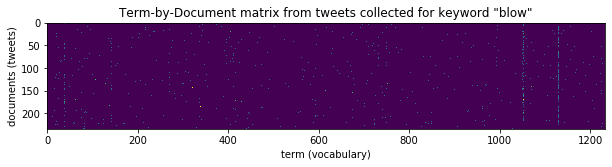

In [26]:
'''
compute the term-by-document matrix and the the dictionary from the collection of 
tweets collected for the first keyword
'''
k1_termdoc, k1_vocab = construct_termdoc(k1_tweets_processed)

# print out the term-by-document matrix
print(k1_termdoc)
# print out the first 5 vocabulary entries
print(' '.join(k1_vocab[-5:]))  # print out only the first 5 vocabulary entries

# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k1_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[0]))

**Note**. Next, we would like to compute the pairwise distances between every two tweets. This will help us to see how similar tweets are. This is a computational task that would be *not* possible to do if we use the raw tweets.

However, with the term-by-document matrix, each tweet now is vector and corresponds to a row in the term-by-document matrix. Hence, we can use the distance between vectors to compute the distance between tweets. This is also known as the **vector space model** in information retrieval literature.

**Instruction 2.11**. Your tasks are:

1. Define a function to compute and return the Euclidean distance between two vectors as we have learned from the class notes. **(5 marks)**

2. Define a function to compute and return the cosine distance between two vectors as we have learned from the class notes. **(5 marks)**

3. Construct a single function that returns two distance matrices ***euclidean_distance_matrix***, and ***cosine_distance_matrix***, whose elements (i,j) store the Eulidean distance and the cosine distance between tweets i-th and i-jth. **You will need this function for subsequent task**. **(6 marks)**

**[Total mark: 16]**

In [27]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

def euclidean_distance(x,y):
    '''
    Compute and return the Euclidean distance between two vectors x and y
    '''
    # INSERT YOUR CODE HERE - code inserted
    euclidean_distance = (np.array(x) - np.array(y))*(np.array(x) - np.array(y))
    
    return np.sqrt(euclidean_distance.sum())

In [28]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
def cosine_distance(x,y):
    '''
    Compute and return the cosine distance between two vectors x and y
    '''
    # INSERT YOUR CODE HERE - code inserted
    try:
        numerator = (x * y).sum()
        numerator += 0.00
        denominator = np.sqrt((x * x).sum()) * np.sqrt((y * y).sum())
        return numerator / denominator
    except ValueError:
        print("Input vectors are not the same size.")
        return None

In [29]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
The function takes the termdoc matrix as the input and computes variables called "euclidean_distance_matrix" 
and "cosine_distance_matrix", which are matrices whose elements (i,j) store the Eulidean distance 
and the cosine distance between tweet i-th and i-jth.

Hint: you should store the distance matrices in numpy arrays for easier implementation in subsequent tasks
'''

def compute_distance_matrices(termdoc):
    # INSERT YOUR CODE HERE - code inserted 
    n_rows = termdoc.shape[0]
    euclidean_distance_matrix = np.zeros((n_rows, n_rows))
    cosine_distance_matrix = np.zeros((n_rows, n_rows))
    
    for i in range(n_rows):
        print(i, end=' ')
        for j in range(n_rows):
            euclidean_distance_matrix[i, j] = euclidean_distance(termdoc[i, :], termdoc[j, :])
            cosine_distance_matrix[i, j] = cosine_distance(termdoc[i, :], termdoc[j, :])
        
    return euclidean_distance_matrix, cosine_distance_matrix

**Instruction 2.12**. 

1. Now you need to compute the distance matrices for **k1_termdoc** and then visualise these distance matrices. **(10 marks)**

2. Explain why cosine distance is always in the range between 0 and 1. **(5 marks)**

3. (HD) Using a scatter plot demonstrate relationship between Euclidean distance and cosine distance. **(5 marks)**

4. (HD) Explain why cosine distance increases if Euclidean distance decreases and vice versa. **(5 marks)**


**[Total mark: 25]**

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 

Text(0.5, 1.0, 'K1 Distance Matrix - Cosine Distances')

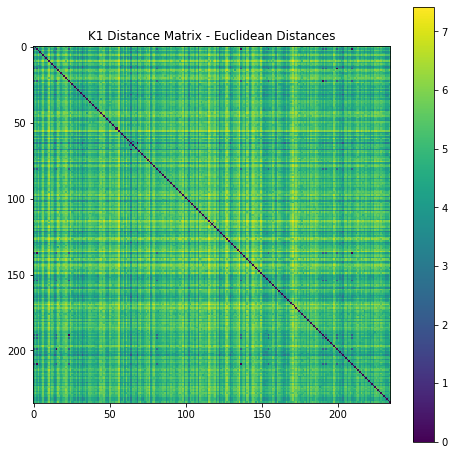

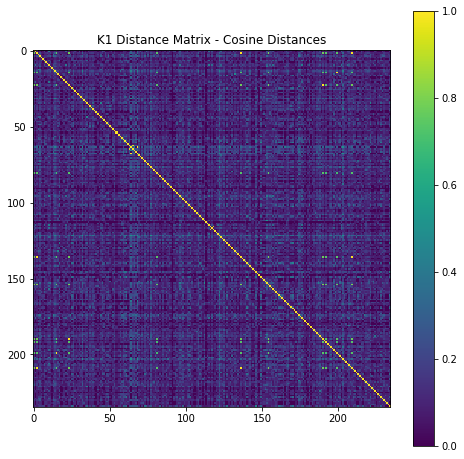

In [30]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the distance matrices for k1_termdoc using the function "compute_distance_matrices"
# INSERT YOUR CODE HERE - code inserted
k1_euclidean_distance, k1_cosine_distance = compute_distance_matrices(k1_termdoc)

# Visualise the distance matrices for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE - code inserted

#visualising the euclidean distance
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(k1_euclidean_distance)
cbar = fig.colorbar(cax)
ax.set_title("K1 Distance Matrix - Euclidean Distances")

# visualising the cosine distances
fig1, ax1 = plt.subplots(figsize=(8, 8))
cax1 = ax1.imshow(k1_cosine_distance)
cbar1 = fig1.colorbar(cax1)
ax1.set_title("K1 Distance Matrix - Cosine Distances")


In [31]:
# Explain why cosine distance is always in the range between 0 and 1.
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
#
# The cosine distance cannot be a negative figure because the denominator of the equation are products of 2 absolute values. 
# Furthermore, the cosine distance formula takes in a degree value between 0 and 90. cos(0) = 1 and cos(90) = 0. The angle
# between two term-by-doc vectors cannot be bigger than 90 degrees.

Text(0.5, 1.0, 'Cosine Distance Scatter Plot')

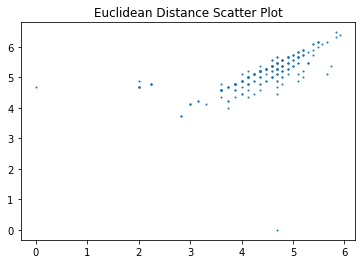

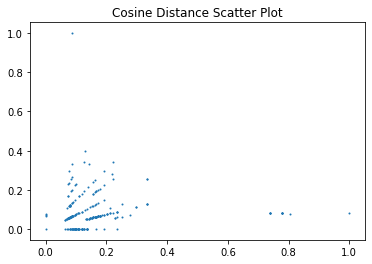

In [32]:
# Using a scatter plot demonstrate relationship between Euclidean distance and cosine distance.
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# INSERT YOUR CODE HERE
fig, ax = plt.subplots()
ax.scatter(k1_euclidean_distance[:, 0], k1_euclidean_distance[:, 1], s=1, cmap='rainbow');
ax.set_title('Euclidean Distance Scatter Plot')

fig, ax = plt.subplots()
ax.scatter(k1_cosine_distance[:, 0], k1_cosine_distance[:, 1], s=1, cmap='rainbow');
ax.set_title('Cosine Distance Scatter Plot')

In [33]:
# Explain why cosine distance increases if Euclidean distance decreases and vice versa.
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL

# It is possible for cosine similarity to have an inverse relationship with euclidean distance. In cases where 
# normalized vectors are used, determining euclidean distance requires applying the formula: 2 x (1 - cosine similarity).
# Based on that equation, it is easy to see that the greater the cosine similarity, the smaller the euclidean distance, vice
# versa.

**Instruction 2.13**. Similar to the example above for the first keyword, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k2_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 5**]

able about absolute across action


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for keyword "walk"')

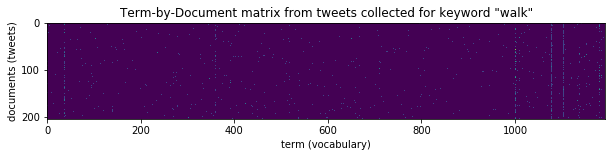

In [34]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k2_tweets_processed
'''
# INSERT YOUR CODE HERE - code inserted
k2_termdoc, k2_vocab = construct_termdoc(k2_tweets_processed)
'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE - code inserted
print(' '.join(k2_vocab[:5]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE - code inserted
# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k2_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[1]))

***Instruction 2.14***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **second** keyword. Store this distance matrix in the variable named ***k2_euclidean_distances*** and **visualise** this matrix.

[**Total mark: 10**]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 

Text(0.5, 1.0, "K2 Distance Matrix ('walk') - Euclidean Distances")

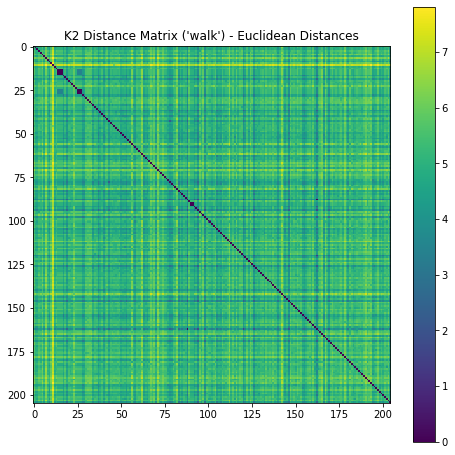

In [35]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the distance matrix for k1_termdoc using the function "compute_euclidean_distance_matrix"
# INSERT YOUR CODE HERE
k2_euclidean_distance, k2_cosine_distance = compute_distance_matrices(k2_termdoc)

# Visualise the distance matrix for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE
#visualising the euclidean distance
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(k2_euclidean_distance)
cbar = fig.colorbar(cax)
ax.set_title("K2 Distance Matrix ('walk') - Euclidean Distances")

**Instruction 2.15**. Similarly, your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for tweets stored in ***k3_tweets_processed***, print out the first **5** vocabularies and visualise this term-by-document matrix.

[**Total mark: 5**]

^v` about above accelerating accessories


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for keyword "walk"')

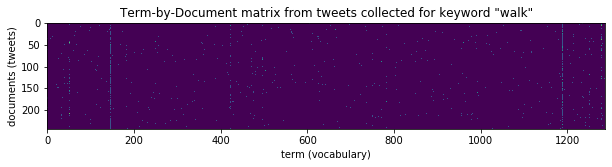

In [36]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for tweets stored 
in k3_tweets_processed
'''
# INSERT YOUR CODE HERE
k3_termdoc, k3_vocab = construct_termdoc(k3_tweets_processed)

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE
print(' '.join(k3_vocab[:5]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k3_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[1]))

***Instruction 2.16***. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for tweets collected for **third** keyword. Store this distance matrix in the variable named ***k3_euclidean_distances*** and visualise this matrix.

[**Total mark: 5**]

^v` about above accelerating accessories
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 

Text(0.5, 1.0, 'K3 Distance Matrix - Euclidean Distances')

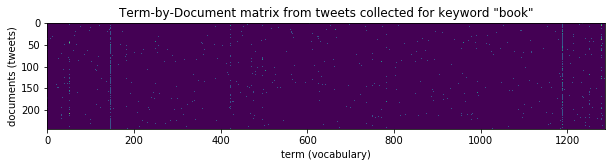

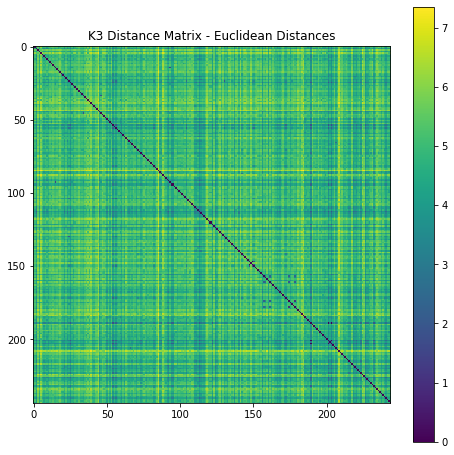

In [37]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the distance matrices for k1_termdoc using the function "compute_distance_matrices"
# INSERT YOUR CODE HERE
k3_termdoc, k3_vocab = construct_termdoc(k3_tweets_processed)
'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE - code inserted
print(' '.join(k3_vocab[:5]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE - code inserted
# visualise the term-by-document matrix
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(k3_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for keyword \"{}\"'.format(keywords[2]))

# compute the distance matrices for k3_termdoc using the function "compute_distance_matrices"
# INSERT YOUR CODE HERE
k3_euclidean_distance, k3_cosine_distance = compute_distance_matrices(k3_termdoc)

# Visualise the distance matrix for this keyword
# Hint: use imshow() and colorbar() functions
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(k3_euclidean_distance)
cbar = fig.colorbar(cax)
ax.set_title("K3 Distance Matrix - Euclidean Distances")


***Instruction 2.17 (HD)***. Compare the ranges of the values for cosine and Euclidean distances. Explain why the ranges are different. Think about the best example to explain why cosine distance is more convenient than Euclidean distance for text analysis.

[**Total mark: 5**]

In [38]:
# Compare the ranges of the values for cosine and Euclidean distances. 
# Explain why the ranges are different. Explain why cosine distance 
# is more convenient than Euclidean distance for text analysis.
#
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL - comment inserted

# The range of euclidean distance is typically larger than cosine distance because unlike cosine distance which determines
# the cosine value of any degree figure between 1 and 90 (which returns any value between 0 and 1), the euclidean distance
# formula can take in any input values that represent 2 points the euclidean distance between which needs to be calculated. 
# This is because the euclidean distance merely calculates distance between 2 points, and it does not adjust for any other 
# factors

# Cosine distance is a more convenient type of analysis because it adjusts for other factors. For example, if we want to 
# analyze 2 documents of different sizes, cosine distance will take into the account the possibility that 2 documents
# of vastly different sizes can still be closely oriented/similar. Euclidean distance does not adjust for this factor.

### Part 2C: Data Clustering

Thus far in this assignment, we have collected tweets for each keyword and analysed them seperately. We have constructed the term-by-document matrix for each collection of tweets seperately. A fundemantal and common task in data science, analytics, machine learning, science and engineering is **clustering**. This is also known as unsupervised learning or exploratory data analysis as we have learned in our classes.

This part of this assignment will use the Kmeans algorithm learned in our classes to cluster the **entire** colllection of tweets collected for **all** keywords. To do so, we need to compute the **distance** between **any** two pair of tweets. This requires us to compute a **joint** term-by-document matrix for all tweets.

The reason that we **cannot** use the individual term-by-document matrices computed earlier (e.g.,***k1_termdoc, k2_termdoc, k3_termdoc***) for this task is because they have different dictionary sizes. Hence, tweets collected for different keywords have been represented by vectors of different dimension. 

The following piece of codes will help you to inspect these dimensions.

In [39]:
print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[0]))
print('{} x {}\n'.format(k1_termdoc.shape[0],k1_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[1]))
print('{} x {}\n'.format(k2_termdoc.shape[0],k2_termdoc.shape[1]))

print('Dimension of the term-by-document matrix for keyword \"{}\":'.format(keywords[2]))
print('{} x {}\n'.format(k3_termdoc.shape[0],k3_termdoc.shape[1]))

Dimension of the term-by-document matrix for keyword "blow":
235 x 1234

Dimension of the term-by-document matrix for keyword "walk":
205 x 1193

Dimension of the term-by-document matrix for keyword "book":
244 x 1288



**Note**. First, we need to gather all tweets together into a new variable named **all_tweets_processed** using the piece of codes below.

In [40]:
all_tweets_processed = k1_tweets_processed + k2_tweets_processed + k3_tweets_processed

**Instruction 2.18**. Your task is to write codes in the cell below to compute the term-by-document matrix and the vocabulary for all tweets stored in ***all_tweets_processed***, print out the first 5 vocabularies and visualise this term-by-document matrix.

[**Total marks: 5**]

^v` able about above absolute


Text(0.5, 1.0, 'Term-by-Document matrix from tweets collected for all keywords')

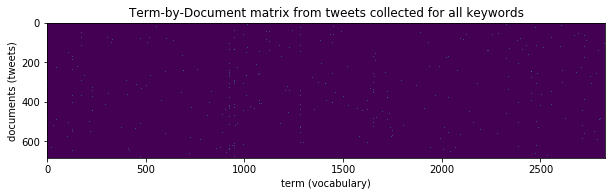

In [41]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to compute the term-by-document matrix and the vocabulary for all tweets stored 
in all_tweets_processed
'''

all_termdoc, all_vocab = construct_termdoc(all_tweets_processed) # INSERT YOUR CODE HERE - code inserted

'''
Write your code print out the first 5 vocabularies 
'''
# INSERT YOUR CODE HERE - code inserted
print(' '.join(all_vocab[:5]))

'''
Write your code to visualise the term-by-document matrix
'''
# INSERT YOUR CODE HERE - code inserted
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(all_termdoc)
ax.set_xlabel('term (vocabulary)')
ax.set_ylabel('documents (tweets)')
ax.set_title('Term-by-Document matrix from tweets collected for all keywords')

**Instruction 2.19**. Next, your task is to write codes in the cell below to calculate the pairwise distance matrix for all tweets collected. Store this distance matrix in the variable named ***all_euclidean_distances*** and visualise this matrix.

[**Total mark: 5**]

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

Text(0.5, 1.0, 'Distance Matrix - All Euclidean Distances')

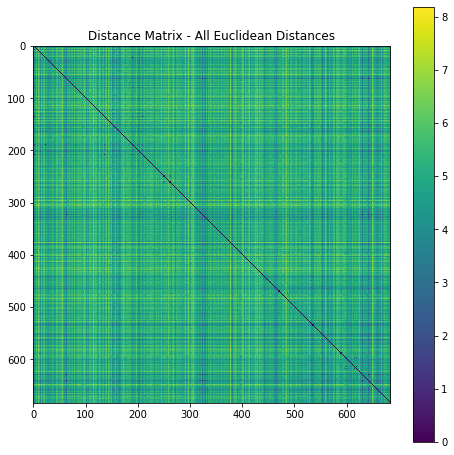

In [42]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# compute the Euclidean distance matrix using compute_euclidean_distance_matrix() function

all_euclidean_distances, all_cosine_distances = compute_distance_matrices(all_termdoc) # INSERT YOUR CODE HERE - code inserted

# Visualise the distance matrix for this keyword
# INSERT YOUR CODE HERE
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(all_euclidean_distances)
cbar = fig.colorbar(cax)
ax.set_title("Distance Matrix - All Euclidean Distances")

**Instruction 2.20 (HD)**. 
1. Your task is to produce a scatter plot of Euclidean vs cosine distance for all tweets. [**2 marks**]
2. Fit first and second order polynomials to the data in the scatter plot and overplot them. [**3 marks**]
3. Explain why the plotted curves do not go through the centre of the points cloud. [**4 marks**]
4. Which visualisation technique would be better to use here? [**1 mark**]

[**Total mark: 10**]

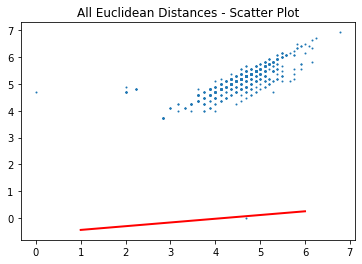

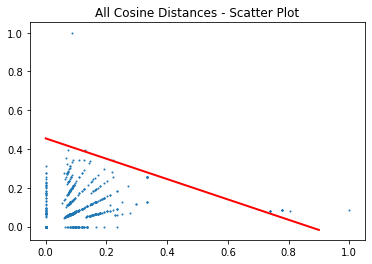

In [43]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# 1. Your task is to produce a scatter plot of Euclidean vs cosine distance for all tweets.
# INSERT YOUR CODE HERE
fig1, ax1 = plt.subplots()
ax1.scatter(all_euclidean_distances[:, 0], all_euclidean_distances[:, 1], s=1, cmap='rainbow');
ax1.set_title('All Euclidean Distances - Scatter Plot')

fig2, ax2 = plt.subplots()
ax2.scatter(all_cosine_distances[:, 0], all_cosine_distances[:, 1], s=1, cmap='rainbow');
ax2.set_title('All Cosine Distances - Scatter Plot')

# 2. Fit a second order polynomial to the data in the scatter plot and overplot it. 
# INSERT YOUR CODE HERE
line_coef = np.polyfit(all_euclidean_distances[:, 0], all_euclidean_distances[:, 1], 2) # inserted number 2 for second degree poly.
x_axis = np.arange(1, 7, 1)
y_axis = line_coef[0]*x_axis + line_coef[1]
ax1.plot(x_axis, y_axis, 'r', lw=2)

line_coef1 = np.polyfit(all_cosine_distances[:, 0], all_cosine_distances[:, 1], 2) # inserted number 2 for second degree poly.
a_axis = np.arange(0, 1, 0.1)
b_axis = line_coef1[0]*a_axis + line_coef1[1]
ax2.plot(a_axis, b_axis, 'r', lw=2)

In [44]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
#3. Explain why the plotted curves do not go through the centre of the points cloud.
#4. Which visualisation technique would be better to use here?
# INSERT YOUR COMMENTS HERE
#
# The plotted line does not go through the centre of the point cloud because we are using a second degree polynomial fit.
# Further, the lack of distinct shape of the clouds may also explain why the plotted line doesn't go through the clouds.
# The better visualisation technique is using 1st degree polynomial, otherwise known as a simple linear regression.

**Note**. Next, we use Kmeans algorithm to cluster all tweets stored in term-by-document matrix ***all_termdoc***. An important requirement for the Kmeans is the specification of the number of clusters which will be specified the variable **n_clusters**.

The following piece of codes will initialise a ***kmeans*** object to be used for subsequent clustering task.

In [45]:
'''
Initialise a kmeans object  from scikit-lean package
'''
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5, max_iter=3000,
                verbose=True, tol=0.000001, random_state=123456)


**Instruction 2.21**. Your task is to use the variable ***kmeans*** to perform clustering on the data stored in the variable ***all_termdoc***.

[**Total mark: 5**]

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 8902.743448858822
start iteration
done sorting
end inner loop
Iteration 1, inertia 8835.25120009367
start iteration
done sorting
end inner loop
Iteration 2, inertia 8738.995058883775
start iteration
done sorting
end inner loop
Iteration 3, inertia 8676.831703204052
start iteration
done sorting
end inner loop
Iteration 4, inertia 8675.333642708638
start iteration
done sorting
end inner loop
Iteration 5, inertia 8673.6313820265
start iteration
done sorting
end inner loop
Iteration 6, inertia 8672.99213609655
start iteration
done sorting
end inner loop
Iteration 7, inertia 8672.472014667219
start iteration
done sorting
end inner loop
Iteration 8, inertia 8672.12990371202
start iteration
done sorting
end inner loop
Iteration 9, inertia 8672.12990371202
center shift 0.000000e+00 within tolerance 4.635426e-09
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 8916.10

Text(0.5, 1.0, 'Estimated Clusters')

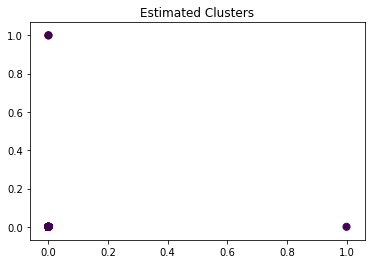

In [46]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

'''
Use the variable kmeans to perform clustering on the data stored in the variable all_termdoc
Hint: revise the practical session on Kmeans algorithm or check out the documentation from scikit-learn
for Kmeans algorithm.
'''
# INSERT YOUR CODE HERE
kmeans.fit(all_termdoc)
x_kmeans = kmeans.predict(all_termdoc)

fig, ax = plt.subplots()
ax.scatter(all_termdoc[:, 0], all_termdoc[:, 1], c=x_kmeans, s=50, cmap='viridis')
ax.set_title('Estimated Clusters')

**Instruction 2.22**. Write your codes to print out the cluster centers.

[**Total mark: 5**]

In [47]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to print out the cluster centers.
'''
# INSERT YOUR CODE HERE - code inserted
def find_clusters (document, cluster_num):
    randomizer = np.random.RandomState(2)
    selection = randomizer.permutation(document.shape[0])[:cluster_num]
    centers = document[selection]
    
    while True:
        labels = pairwise_distances_argmin(document, centers)
        
        new_centers = np.array([document[labels == selection].mean(0)
                                for selection in range(cluster_num)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

# printing out the cluster centers
centers, labels = find_clusters(all_termdoc, 3)

print(f"The cluster centers are: {centers}.")

The cluster centers are: [[0.         0.         0.25       ... 0.         0.         0.        ]
 [0.00257069 0.00257069 0.05141388 ... 0.         0.00257069 0.        ]
 [0.         0.00687285 0.08247423 ... 0.00687285 0.         0.00343643]].


**Instruction 2.23 (HD)**. Explain below why visualising the clusters here is hard to do in this case.

[**Total mark: 5**]

In [48]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# Explain below why visualising the clusters here is hard to do in this case.
# INSERT YOUR COMMENT HERE

# Visualizing clusters in this case is difficult because the values are all superimposed on one another.

**Instruction 2.24 (HD)**. Nevertheless, it is possible to visualise the structure of the cluster centres - surprisingly, using bar charts. Each vector component in the cluster centre vectors corresponds to a word in the dictionary. The value (amplitude) of the vector component for each particular word in the dictionary shows the strength of presence of a word in the cluster.
In this task, you want to:
1. Plot bar charts for each of the three clusters, obtained from KMeans, where each bar chart has 20 strongest words sorted by their presence strength. [**5 marks**]
2. Explain the bar charts from the point of view of chosen keywords, English grammar and our text preprocessing routine. [**5 marks**]

[**Total mark: 10**]

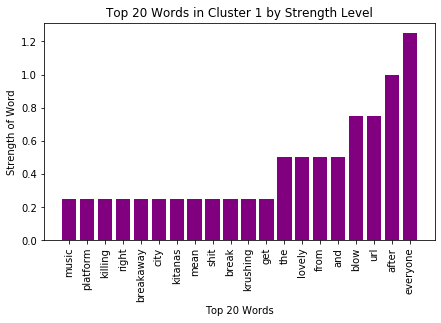

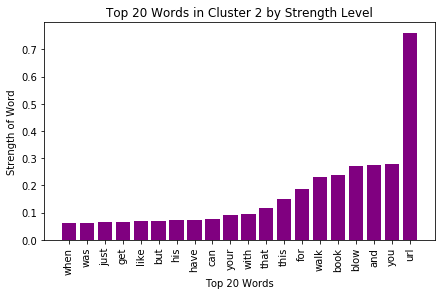

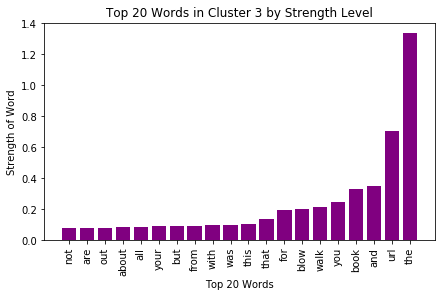

In [49]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
# 1. Plot bar charts for each of the three clusters, obtained from KMeans, 
# where each bar chart has 20 strongest words sorted by their presence strength.
# INSERT YOUR CODE HERE - code inserted
# 1. finding the indices of the top 20 words
def top_20_analysis (cluster_num):
    sort_center = np.argsort(centers[cluster_num])
    top_20_index = []
    for i in range(len(sort_center) - 20, len(sort_center)):
        top_20_index.append(sort_center[i])

    # 2. getting the words that match those indices
    top_20_words = []
    for i in top_20_index:
        top_20_words.append(all_vocab[i])

    # 3. getting the 'word strength' of each of those top 20 words
    top_20_strength = []
    for i in top_20_index:
        top_20_strength.append(centers[cluster_num][i])
        
    return top_20_index, top_20_words, top_20_strength

def make_barchart (cluster_num):
    c1_t20i, c1_t20w, c1_t20s = top_20_analysis(cluster_num)

    x_pos = np.arange(len(c1_t20s))

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.bar(x_pos, c1_t20s, color='purple', align='center')

    ax.set_xlabel("Top 20 Words")
    ax.set_ylabel("Strength of Word")
    ax.set_title(f"Top 20 Words in Cluster {cluster_num + 1} by Strength Level")

    ax.set_xticks(x_pos)
    plt.xticks(rotation=90)
    ax.set_xticklabels(c1_t20w)

make_barchart(0)
make_barchart(1)
make_barchart(2)

In [50]:
# YOU ARE REQUIRED TO INSERT YOUR COMMENT IN THIS CELL
# Explain the bar charts from the point of view of chosen keywords, English grammar 
# and our text preprocessing routine.
# INSERT YOUR COMMENT HERE - comment inserted

# The bar chart is a nice visual representation of the fact that the most commonly used English words (e.g the, and)
# appear most frequently in the tweets. Because the pre-processing function only removes words with less than 3 characters,
# those commonly used words were not caught by the function. Furthermore, the fact that strength levels of the chosen 
# keywords are similar (between 1 and 7) in each cluster perhaps indicates that such words are commonly used together
# in phrases/sentences.

**Instruction 2.25**. Write your codes to print out the first **200** cluster labels assigned to the first 200 tweets.

[**Total marks: 5**]

In [51]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your codes to print out the first **200** cluster labels assigned to the first 200 tweets.
'''
# INSERT YOUR CODE HERE
label = kmeans.predict(all_termdoc)

print("== Cluster Labels for the First 200 Tweets ==")
for i in range(200):
    print(f" Cluster Label for tweet {i+1}: Cluster {label[i]}")

== Cluster Labels for the First 200 Tweets ==
 Cluster Label for tweet 1: Cluster 0
 Cluster Label for tweet 2: Cluster 2
 Cluster Label for tweet 3: Cluster 0
 Cluster Label for tweet 4: Cluster 0
 Cluster Label for tweet 5: Cluster 0
 Cluster Label for tweet 6: Cluster 0
 Cluster Label for tweet 7: Cluster 0
 Cluster Label for tweet 8: Cluster 2
 Cluster Label for tweet 9: Cluster 0
 Cluster Label for tweet 10: Cluster 0
 Cluster Label for tweet 11: Cluster 2
 Cluster Label for tweet 12: Cluster 0
 Cluster Label for tweet 13: Cluster 0
 Cluster Label for tweet 14: Cluster 0
 Cluster Label for tweet 15: Cluster 0
 Cluster Label for tweet 16: Cluster 0
 Cluster Label for tweet 17: Cluster 0
 Cluster Label for tweet 18: Cluster 1
 Cluster Label for tweet 19: Cluster 0
 Cluster Label for tweet 20: Cluster 0
 Cluster Label for tweet 21: Cluster 0
 Cluster Label for tweet 22: Cluster 2
 Cluster Label for tweet 23: Cluster 0
 Cluster Label for tweet 24: Cluster 0
 Cluster Label for tweet 25

**Instruction 2.26**. Next, we would like to obtain the quality of our clustering results. Write your code to obtain the labels of tweets for each keyword and store the labels in three new variables ***k1_labels***, ***k2_labels*** and ***k3_labels***, respectively.

**[Total marks: 5]**

In [52]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

'''
Write your code to obtain the labels of tweets for each keyword
and store the labels of the first keyword in ***k1_labels***, 
the labels of the second keyword in ***k2_labels*** and
the labels of the third keyword in ***k3_labels***.
'''
# INSERT YOUR CODE HERE
kmeans.fit(k1_termdoc)
k1_labels = kmeans.predict(k1_termdoc)

kmeans.fit(k2_termdoc)
k2_labels = kmeans.predict(k2_termdoc)

kmeans.fit(k3_termdoc)
k3_labels = kmeans.predict(k3_termdoc)

print(len(k1_labels))

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2849.6259713701434
start iteration
done sorting
end inner loop
Iteration 1, inertia 2842.525357873211
start iteration
done sorting
end inner loop
Iteration 2, inertia 2835.73984629961
start iteration
done sorting
end inner loop
Iteration 3, inertia 2828.7105532909013
start iteration
done sorting
end inner loop
Iteration 4, inertia 2822.4364118895965
start iteration
done sorting
end inner loop
Iteration 5, inertia 2821.0199730094478
start iteration
done sorting
end inner loop
Iteration 6, inertia 2821.0199730094478
center shift 0.000000e+00 within tolerance 1.024229e-08
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2890.000159578712
start iteration
done sorting
end inner loop
Iteration 1, inertia 2879.9813706929194
start iteration
done sorting
end inner loop
Iteration 2, inertia 2873.062328614838
start iteration
done sorting
end inner loop
Iteration 3, iner

Iteration 16, inertia 2827.5334005182835
center shift 0.000000e+00 within tolerance 9.431738e-09
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2920.279166666666
start iteration
done sorting
end inner loop
Iteration 1, inertia 2905.185654008438
start iteration
done sorting
end inner loop
Iteration 2, inertia 2894.8162393162397
start iteration
done sorting
end inner loop
Iteration 3, inertia 2871.0622222222223
start iteration
done sorting
end inner loop
Iteration 4, inertia 2849.0635367298582
start iteration
done sorting
end inner loop
Iteration 5, inertia 2834.1986453201966
start iteration
done sorting
end inner loop
Iteration 6, inertia 2834.1986453201966
center shift 0.000000e+00 within tolerance 9.431738e-09
235


**Instruction 2.27 (D)**. We examine what is the proprotion of tweets from different keywords (or categories) appear in the **first** cluster. Remember that **0** is the label for the first cluster (**1** for the second and **2** for the third clusters). Your tasks are:

1. Write your code to obtain the list of tweet indices of each keyword that are assigned to the first cluster. **(3 marks)**

2. Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the first cluster. **(2 marks)**

**[Total mark: 5]**

In [53]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Write your code to obtain the list of tweet indices of each keyword that are assigned to the first cluster.
Hint: you might want to use numpy.where function.
'''
# obtain the list of tweet indices of keyword k1 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k1_labels
k1_idx_label0 = np.where(k1_labels == 0) # INSERT YOUR CODE HERE - code inserted

# obtain the list of tweet indices of keyword k2 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k2_labels
k2_idx_label0 = np.where(k2_labels == 0) # INSERT YOUR CODE HERE - code inserted

# obtain the list of tweet indices of keyword k3 that are assigned to the first cluster
# means that to find tweet indices that have label 0 in k3_labels
k3_idx_label0 = np.where(k3_labels == 0) # INSERT YOUR CODE HERE - code inserted


[Text(0, 0, 'K1'), Text(0, 0, 'K2'), Text(0, 0, 'K3')]

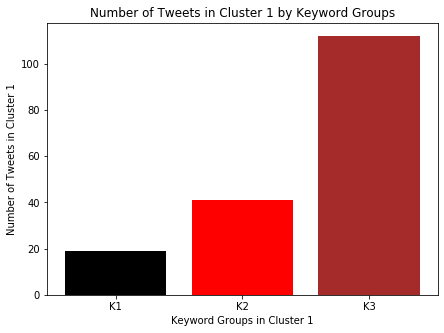

In [54]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL
'''
Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the first cluster.
Hint: you need to plot a bar chart with three bars, 
each bar represents the number of tweets of each keyword that are assigned to the first cluster.
'''
# INSERT YOUR CODE HERE - code inserted
labels = ['K1', 'K2', 'K3']
colours = ['black', 'red', 'brown']

# code to get frequency in an array
keyword_group = [k1_idx_label0, k2_idx_label0, k3_idx_label0]
tweet_freq = []

for i in keyword_group:
    for j in i:
        count = len(j)
        tweet_freq.append(count)

x_pos = np.arange(len(tweet_freq))

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x_pos, tweet_freq, color=colours, align='center')

ax.set_xlabel("Keyword Groups in Cluster 1")
ax.set_ylabel("Number of Tweets in Cluster 1")
ax.set_title("Number of Tweets in Cluster 1 by Keyword Groups")

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

**Instruction 2.28 (D)**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **second** cluster and plot a bar chart visualise this information.

[**Total mark: 5**]

[Text(0, 0, 'K1'), Text(0, 0, 'K2'), Text(0, 0, 'K3')]

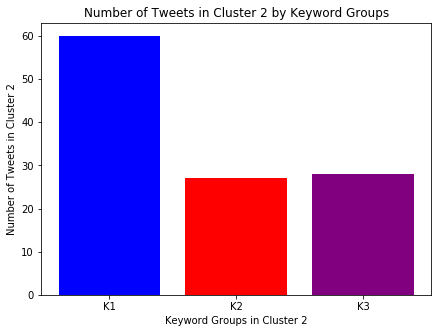

In [55]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k1_labels
k1_idx_label1 = np.where(k1_labels == 1) # INSERT YOUR CODE HERE - code inserted

# obtain the list of tweet indices of keyword k2 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k2_labels
k2_idx_label1 = np.where(k2_labels == 1) # INSERT YOUR CODE HERE- code inserted

# obtain the list of tweet indices of keyword k3 that are assigned to the second cluster
# means that to find tweet indices that have label 1 in k3_labels
k3_idx_label1 = np.where(k3_labels == 1) # INSERT YOUR CODE HERE - code inserted

# Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the second cluster
# INSERT YOUR CODE HERE
labels = ['K1', 'K2', 'K3']
colours = ['blue', 'red', 'purple']

# code to get frequency in an array
keyword_group = [k1_idx_label1, k2_idx_label1, k3_idx_label1]
tweet_freq = []

for i in keyword_group:
    for j in i:
        count = len(j)
        tweet_freq.append(count)

x_pos = np.arange(len(tweet_freq))

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x_pos, tweet_freq, color=colours, align='center')

ax.set_xlabel("Keyword Groups in Cluster 2")
ax.set_ylabel("Number of Tweets in Cluster 2")
ax.set_title("Number of Tweets in Cluster 2 by Keyword Groups")

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)

**Instruction 2.29 (D)**. Similarly, write your codes to compute the the proprotion of tweets from different keywords (or categories) appear in the **third** cluster and plot a bar chart visualise this information.

[**Total mark: 5**]

[Text(0, 0, 'K1'), Text(0, 0, 'K2'), Text(0, 0, 'K3')]

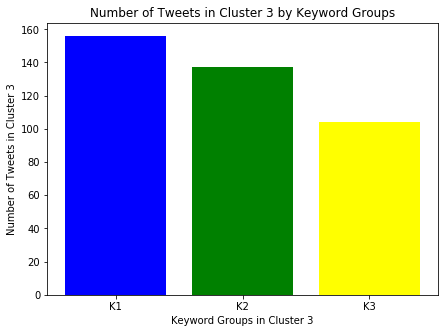

In [56]:
# YOU ARE REQUIRED TO INSERT YOUR CODE IN THIS CELL

# obtain the list of tweet indices of keyword k1 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k1_labels
k1_idx_label2 = np.where(k1_labels == 2) # INSERT YOUR CODE HERE - code inserted

# obtain the list of tweet indices of keyword k2 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k2_labels
k2_idx_label2 = np.where(k2_labels == 2) # INSERT YOUR CODE HERE - code inserted

# obtain the list of tweet indices of keyword k3 that are assigned to the third cluster
# means that to find tweet indices that have label 2 in k3_labels
k3_idx_label2 = np.where(k3_labels == 2) # INSERT YOUR CODE HERE - code inserted

# Plot a bar chart to visualise the number of tweets of each keyword that are assigned to the third cluster
# INSERT YOUR CODE HERE - code inserted
labels = ['K1', 'K2', 'K3']
colours = ['blue', 'green', 'yellow']

# code to get frequency in an array
keyword_group = [k1_idx_label2, k2_idx_label2, k3_idx_label2]
tweet_freq = []

for i in keyword_group:
    for j in i:
        count = len(j)
        tweet_freq.append(count)

x_pos = np.arange(len(tweet_freq))

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x_pos, tweet_freq, color=colours, align='center')

ax.set_xlabel("Keyword Groups in Cluster 3")
ax.set_ylabel("Number of Tweets in Cluster 3")
ax.set_title("Number of Tweets in Cluster 3 by Keyword Groups")

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)


### END OF ASSIGNMENT 2 NOTEBOOK

----